In [1]:
import pandas as pd

# Read the data from the CSV file
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [2]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [3]:
test_df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [5]:
# merge data for cleaning
ntrain = df.shape[0]
ntest = test_df.shape[0]
trainID = df['id']
testID = test_df['id']

merged_df = pd.concat((df, test_df), axis=0).reset_index(drop=True)

In [6]:
merged_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435.0


In [7]:
# print shapes of data
print("Train data shape: ", df.shape)
print("Test data shape: ", test_df.shape)
print("Merged data shape: ", merged_df.shape)

Train data shape:  (1458644, 11)
Test data shape:  (625134, 9)
Merged data shape:  (2083778, 11)


In [8]:
merged_df = merged_df.drop('dropoff_datetime', axis=1)

In [9]:
merged_df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455.0
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663.0
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124.0
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429.0
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435.0


In [10]:
merged_df.shape

(2083778, 10)

In [11]:
# check for missing values
missing_values = merged_df.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
print(missing_values)

trip_duration    625134
dtype: int64


In [12]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
vendor_id,2083778.0,1.534930,0.498779,1.000000,1.000000,2.000000,2.000000,2.000000e+00
passenger_count,2083778.0,1.663700,1.313358,0.000000,1.000000,1.000000,2.000000,9.000000e+00
pickup_longitude,2083778.0,-73.973525,0.071657,-121.933342,-73.991859,-73.981743,-73.967346,-6.133553e+01
pickup_latitude,2083778.0,40.750923,0.032001,34.359695,40.737362,40.754101,40.768368,5.188108e+01
dropoff_longitude,2083778.0,-73.973429,0.071225,-121.933327,-73.991325,-73.979759,-73.963013,-6.133553e+01
dropoff_latitude,2083778.0,40.751804,0.035871,32.181141,40.735920,40.754532,40.769821,4.885760e+01
trip_duration,1458644.0,959.492273,5237.431724,1.000000,397.000000,662.000000,1075.000000,3.526282e+06


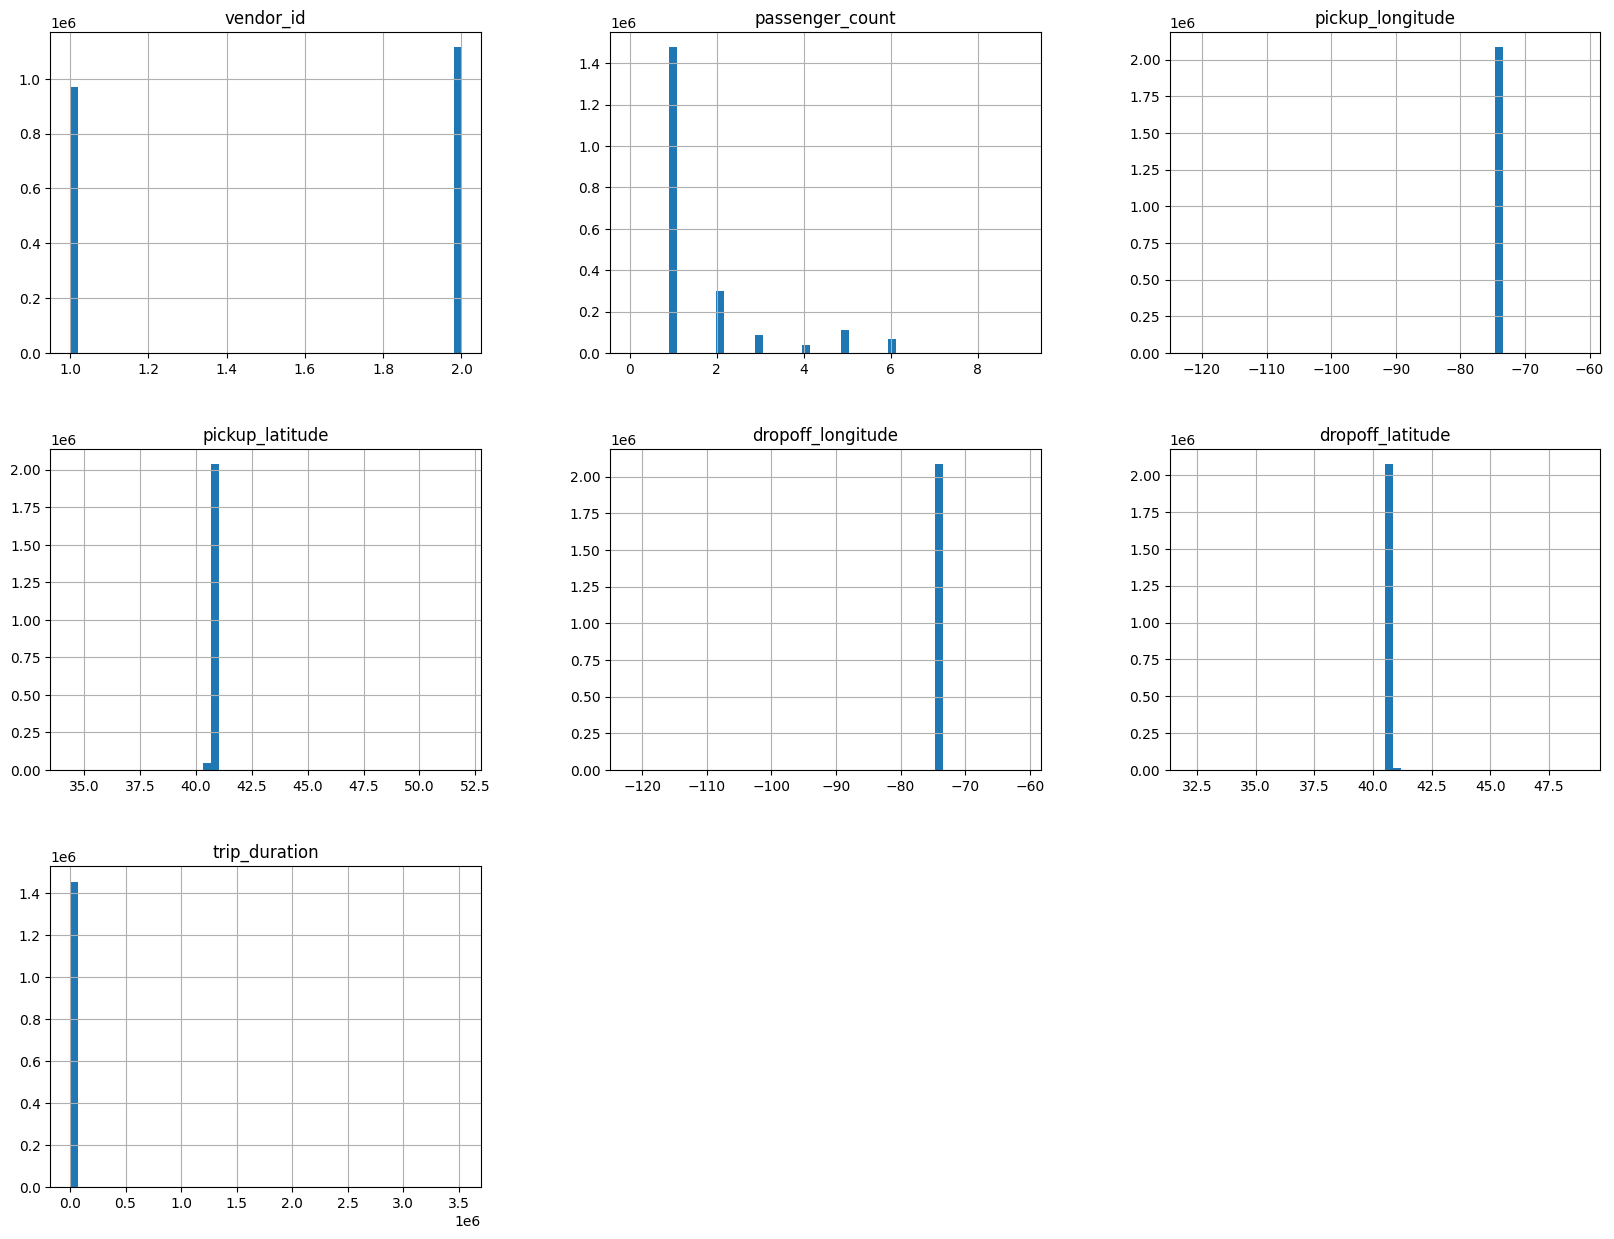

In [13]:
# histogram of each feature
import matplotlib.pyplot as plt
merged_df.hist(bins=50, figsize=(20, 15))
plt.show()

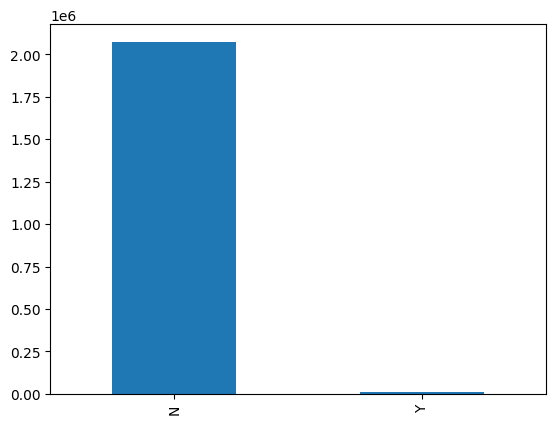

In [14]:
# bar plot of each categorical feature
merged_df['store_and_fwd_flag'].value_counts().plot(kind='bar')
plt.show()

In [15]:
# preprocess the pickup_datetime
merged_df['pickup_datetime'] = pd.to_datetime(merged_df['pickup_datetime'])
merged_df['pickup_date'] = merged_df['pickup_datetime'].dt.date
merged_df['pickup_time'] = merged_df['pickup_datetime'].dt.time
merged_df['pickup_hour'] = merged_df['pickup_datetime'].dt.hour
merged_df['pickup_day'] = merged_df['pickup_datetime'].dt.day
merged_df['pickup_month'] = merged_df['pickup_datetime'].dt.month
merged_df['pickup_year'] = merged_df['pickup_datetime'].dt.year
merged_df['pickup_weekday'] = merged_df['pickup_datetime'].dt.weekday

In [16]:
# drop the original pickup_datetime column
merged_df = merged_df.drop('pickup_datetime', axis=1)

In [17]:
merged_df.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_time,pickup_hour,pickup_day,pickup_month,pickup_year,pickup_weekday
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455.0,2016-03-14,17:24:55,17,14,3,2016,0
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663.0,2016-06-12,00:43:35,0,12,6,2016,6
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124.0,2016-01-19,11:35:24,11,19,1,2016,1
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429.0,2016-04-06,19:32:31,19,6,4,2016,2
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435.0,2016-03-26,13:30:55,13,26,3,2016,5


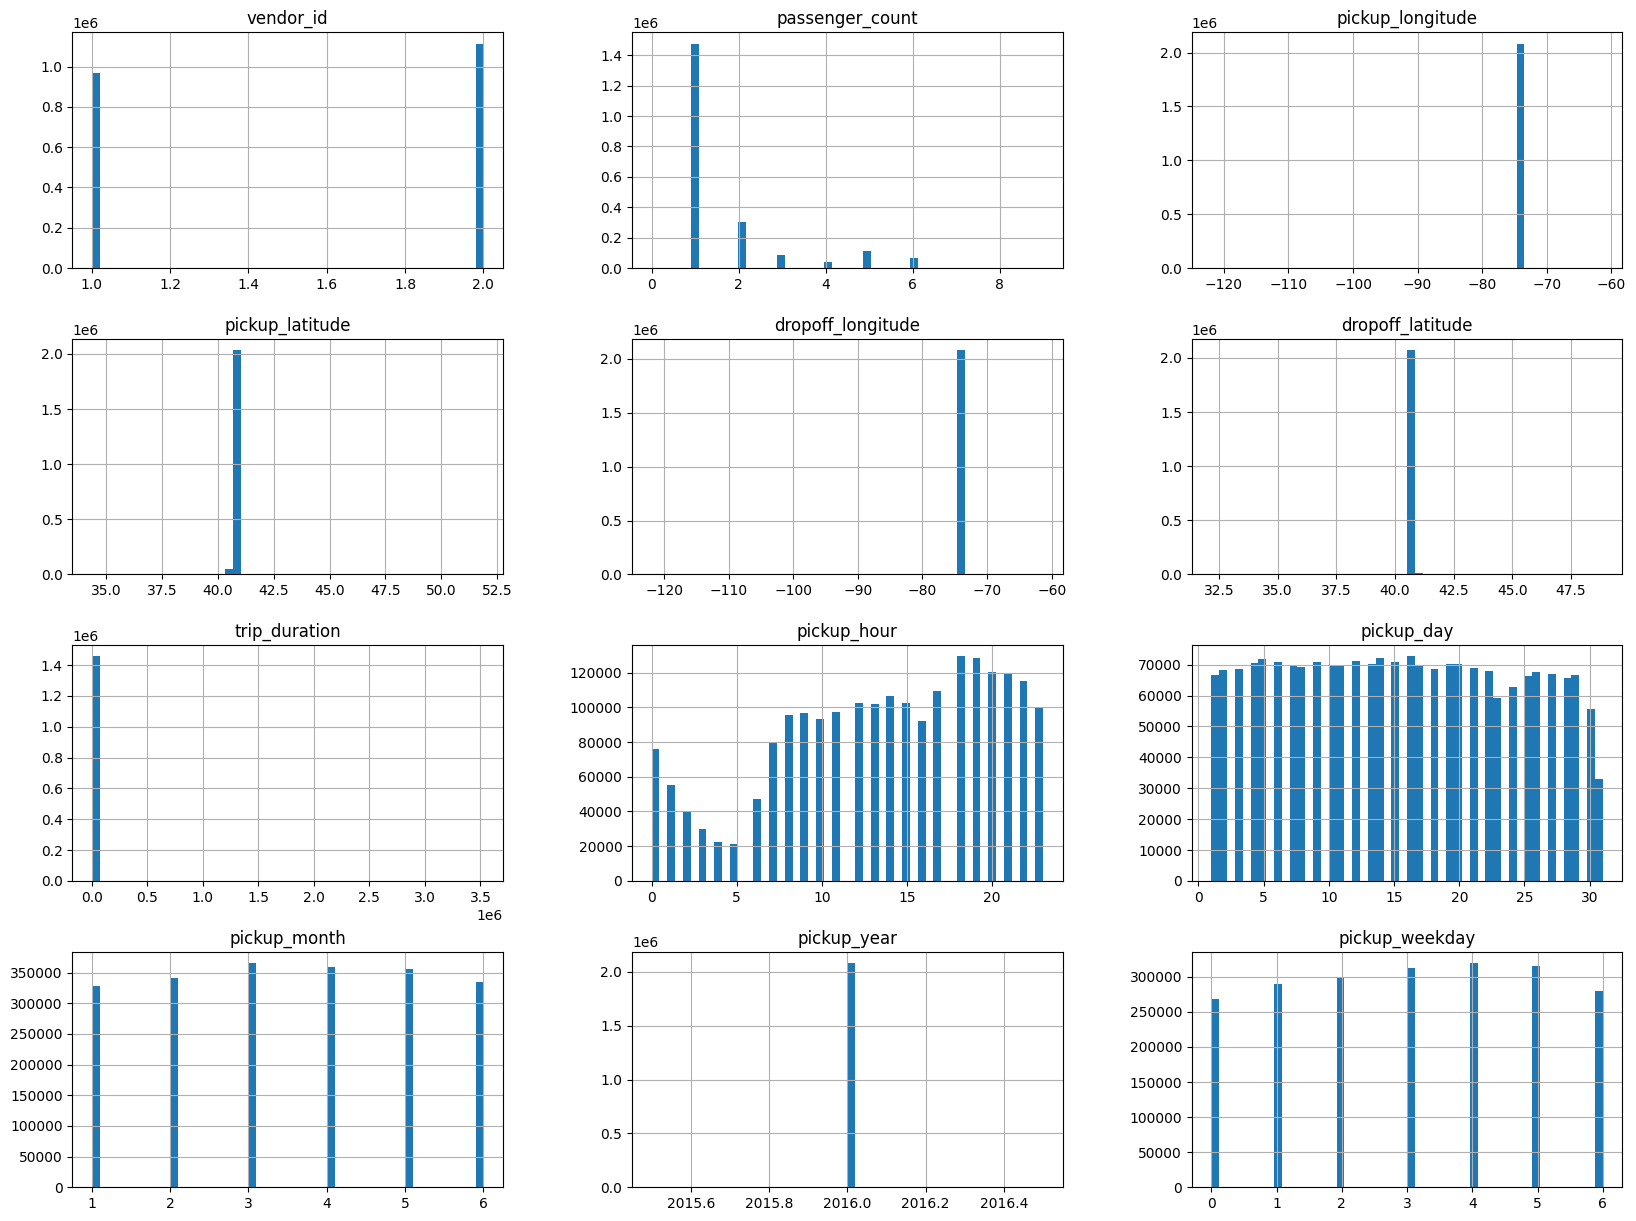

In [18]:
# histogram of new features
merged_df.hist(bins=50, figsize=(20, 15))
plt.show()

In [19]:
# drop the pickup_date and pickup_time columns
merged_df = merged_df.drop(['pickup_date', 'pickup_time'], axis=1)

In [20]:
# label encode the store_and_fwd_flag column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
merged_df['store_and_fwd_flag'] = le.fit_transform(merged_df['store_and_fwd_flag'])

In [21]:
merged_df.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_day,pickup_month,pickup_year,pickup_weekday
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455.0,17,14,3,2016,0
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663.0,0,12,6,2016,6
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,0,2124.0,11,19,1,2016,1
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,0,429.0,19,6,4,2016,2
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,0,435.0,13,26,3,2016,5


In [22]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
vendor_id,2083778.0,1.534930,0.498779,1.000000,1.000000,2.000000,2.000000,2.000000e+00
passenger_count,2083778.0,1.663700,1.313358,0.000000,1.000000,1.000000,2.000000,9.000000e+00
pickup_longitude,2083778.0,-73.973525,0.071657,-121.933342,-73.991859,-73.981743,-73.967346,-6.133553e+01
pickup_latitude,2083778.0,40.750923,0.032001,34.359695,40.737362,40.754101,40.768368,5.188108e+01
dropoff_longitude,2083778.0,-73.973429,0.071225,-121.933327,-73.991325,-73.979759,-73.963013,-6.133553e+01
dropoff_latitude,2083778.0,40.751804,0.035871,32.181141,40.735920,40.754532,40.769821,4.885760e+01
store_and_fwd_flag,2083778.0,0.005507,0.074003,0.000000,0.000000,0.000000,0.000000,1.000000e+00
trip_duration,1458644.0,959.492273,5237.431724,1.000000,397.000000,662.000000,1075.000000,3.526282e+06
pickup_hour,2083778.0,13.607607,6.398213,0.000000,9.000000,14.000000,19.000000,2.300000e+01
pickup_day,2083778.0,15.498997,8.703372,1.000000,8.000000,15.000000,23.000000,3.100000e+01


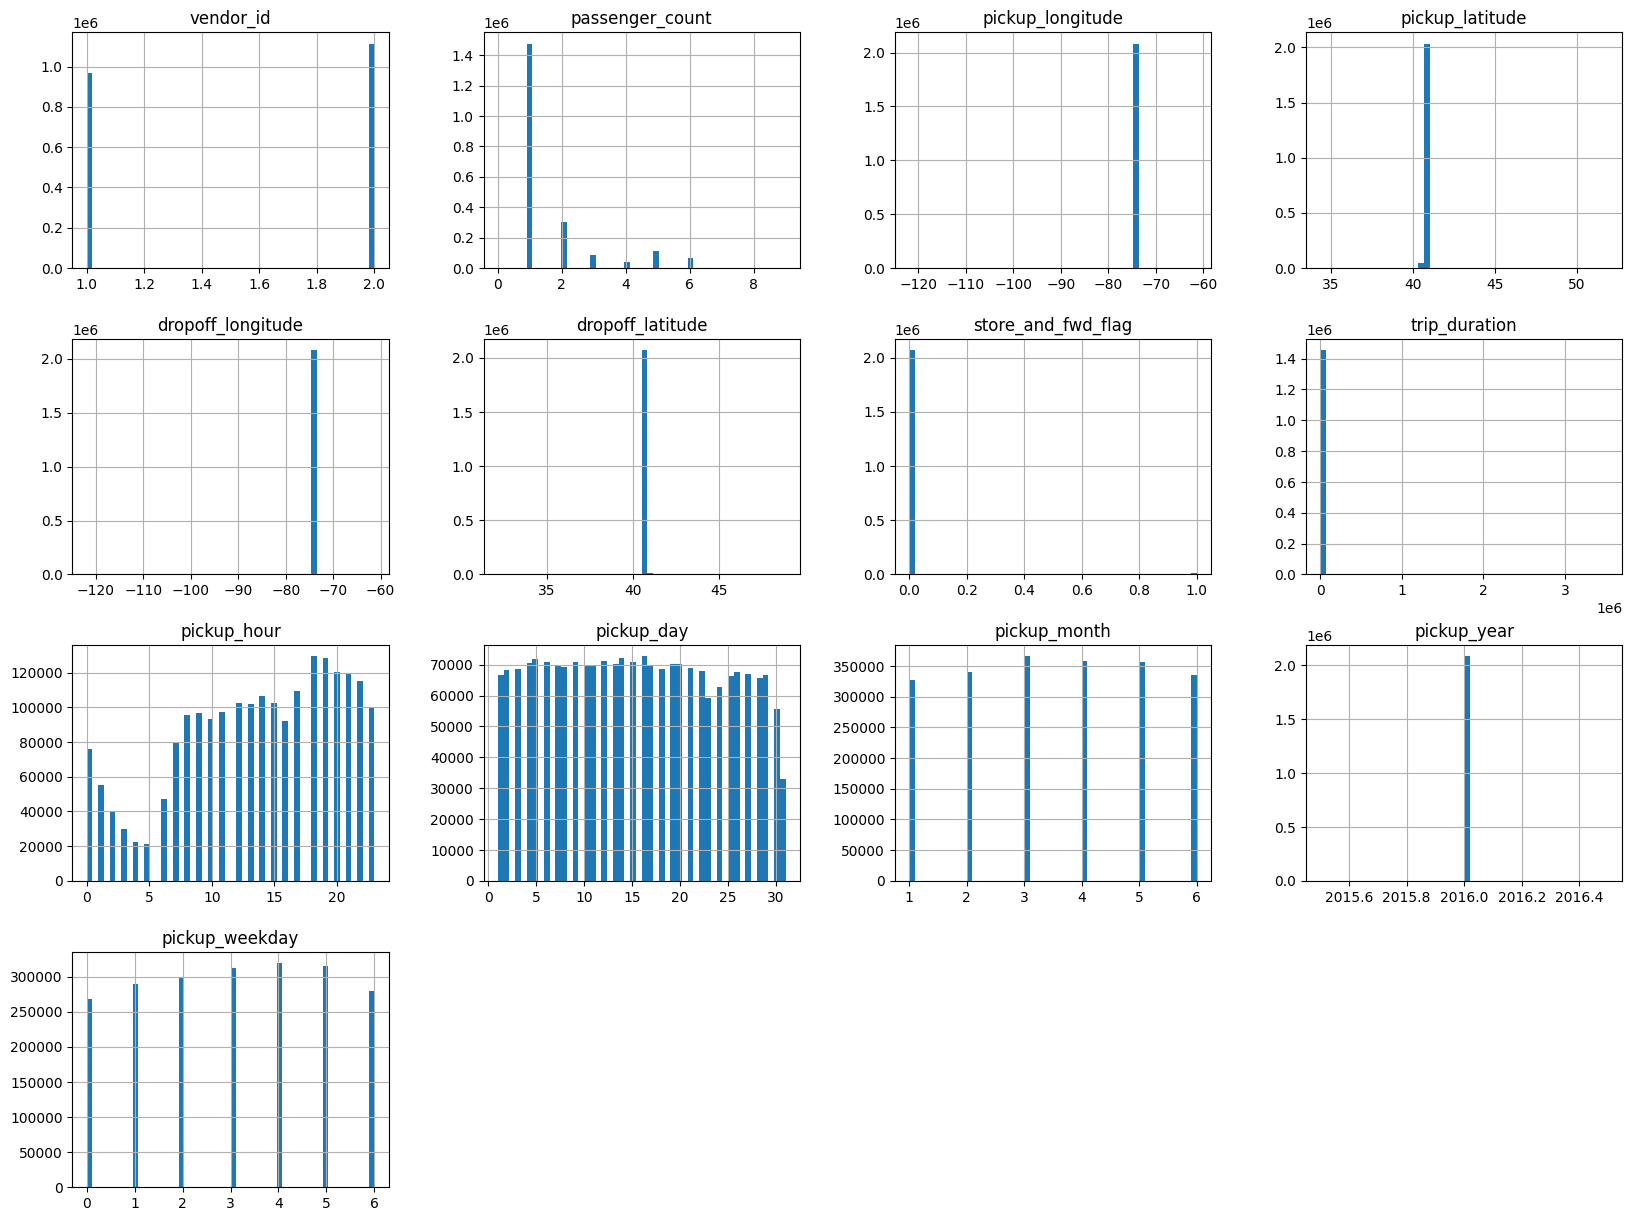

In [23]:
# histogram of each feature
merged_df.hist(bins=50, figsize=(20, 15))
plt.show()

In [24]:
# drop the id column
merged_df = merged_df.drop('id', axis=1)
merged_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_day,pickup_month,pickup_year,pickup_weekday
0,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455.0,17,14,3,2016,0
1,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663.0,0,12,6,2016,6
2,2,1,-73.979027,40.763939,-74.005333,40.710087,0,2124.0,11,19,1,2016,1
3,2,1,-74.010040,40.719971,-74.012268,40.706718,0,429.0,19,6,4,2016,2
4,2,1,-73.973053,40.793209,-73.972923,40.782520,0,435.0,13,26,3,2016,5


In [25]:
# check for missing values
missing_values = merged_df.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
print(missing_values)

trip_duration    625134
dtype: int64


In [28]:
# scale the data with RobustScaler ignoring trip_duration
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

merged_df_scaled = RobustScaler().fit_transform(merged_df.drop('trip_duration', axis=1))
merged_df_scaled = pd.DataFrame(merged_df_scaled, columns=merged_df.columns[:-1])
merged_df_scaled['trip_duration'] = merged_df['trip_duration']
merged_df_scaled.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_day,pickup_month,pickup_year
0,0.0,0.0,-0.016807,0.446235,0.534357,0.326544,0.0,455.0,-0.066667,-0.333333,0.0,-0.75
1,-1.0,0.0,0.054155,-0.501107,-0.696578,-0.689659,0.0,663.0,-0.200000,0.666667,0.0,0.75
2,0.0,0.0,0.110800,0.317298,-0.903261,-1.311016,0.0,2124.0,0.266667,-1.000000,0.0,-0.50
3,0.0,0.0,-1.154373,-1.100763,-1.148208,-1.410375,0.0,429.0,-0.600000,0.000000,0.0,-0.25
4,0.0,0.0,0.354497,1.261319,0.241444,0.825588,0.0,435.0,0.733333,-0.333333,0.0,0.50


In [29]:
merged_df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
vendor_id,2083778.0,-0.465070,0.498779,-1.000000,-1.000000,0.0,0.000000,0.000000e+00
passenger_count,2083778.0,0.663700,1.313358,-1.000000,0.000000,0.0,1.000000,8.000000e+00
pickup_longitude,2083778.0,0.335253,2.923198,-1956.150638,-0.412698,0.0,0.587302,5.158931e+02
pickup_latitude,2083778.0,-0.102495,1.032108,-206.232160,-0.539862,0.0,0.460138,3.588671e+02
dropoff_longitude,2083778.0,0.223597,2.515664,-1693.713285,-0.408515,0.0,0.591485,4.465924e+02
dropoff_latitude,2083778.0,-0.080451,1.058091,-252.893327,-0.549004,0.0,0.450996,2.390199e+02
store_and_fwd_flag,2083778.0,0.005507,0.074003,0.000000,0.000000,0.0,0.000000,1.000000e+00
trip_duration,1458644.0,959.492273,5237.431724,1.000000,397.000000,662.0,1075.000000,3.526282e+06
pickup_hour,2083778.0,0.033266,0.580225,-0.933333,-0.466667,0.0,0.533333,1.066667e+00
pickup_day,2083778.0,-0.160555,0.560247,-1.000000,-0.666667,0.0,0.333333,6.666667e-01


In [33]:
# split merged data back to train and test data
train_df = merged_df_scaled[:ntrain]
test_df = merged_df_scaled[ntrain:]

In [36]:
train_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_day,pickup_month,pickup_year
0,0.0,0.0,-0.016807,0.446235,0.534357,0.326544,0.0,455.0,-0.066667,-0.333333,0.0,-0.75
1,-1.0,0.0,0.054155,-0.501107,-0.696578,-0.689659,0.0,663.0,-0.200000,0.666667,0.0,0.75
2,0.0,0.0,0.110800,0.317298,-0.903261,-1.311016,0.0,2124.0,0.266667,-1.000000,0.0,-0.50
3,0.0,0.0,-1.154373,-1.100763,-1.148208,-1.410375,0.0,429.0,-0.600000,0.000000,0.0,-0.25
4,0.0,0.0,0.354497,1.261319,0.241444,0.825588,0.0,435.0,0.733333,-0.333333,0.0,0.50


In [37]:
test_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_day,pickup_month,pickup_year
1458644,-1.0,0.0,-0.260504,-0.711860,-0.367825,0.063351,0.0,NaN,1.0,0.666667,0.0,0.0
1458645,-1.0,0.0,0.715531,-2.390133,0.704662,-2.924046,0.0,NaN,1.0,0.666667,0.0,0.0
1458646,-1.0,0.0,-0.640212,-0.532726,-0.226085,-0.737707,0.0,NaN,1.0,0.666667,0.0,0.0
1458647,0.0,0.0,1.047308,0.574065,-0.235516,-0.709801,0.0,NaN,1.0,0.666667,0.0,0.0
1458648,-1.0,0.0,0.470277,0.237820,0.644570,0.040059,0.0,NaN,1.0,0.666667,0.0,0.0


In [38]:
import numpy as np

def rmsle(y_true, y_pred):
    """
    Calculate Root Mean Squared Logarithmic Error (RMSLE) between true and predicted values.
    
    Parameters:
        y_true (numpy array): Actual trip durations.
        y_pred (numpy array): Predicted trip durations.
        
    Returns:
        float: RMSLE value.
    """
    # Ensure y_true and y_pred have the same shape
    assert len(y_true) == len(y_pred)
    
    # Add 1 to both values to avoid log(0) error
    y_true += 1
    y_pred += 1
    
    # Calculate logarithm of both values
    log_y_true = np.log(y_true)
    log_y_pred = np.log(y_pred)
    
    # Calculate squared difference between logs
    sq_diff = (log_y_true - log_y_pred) ** 2
    
    # Calculate mean of squared differences
    mse = np.mean(sq_diff)
    
    # Take square root and return RMSLE value
    return np.sqrt(mse)

In [39]:
print(train_df.columns)

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_hour', 'pickup_day', 'pickup_month',
       'pickup_year'],
      dtype='object')


In [40]:
train_df.shape

(1458644, 12)